<a href="https://colab.research.google.com/github/Aquiles07/Actividades_Curso/blob/main/02_MLP_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales MLP para regresión

✅ Conectar la notebook en modo GPU (**en este caso no es muy necesario**)

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

En esta notebook describiremos cómo resolver un problema de regresión usando una red neuronal MLP.

Usaremos el conjunto de datos [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construiremos un modelo para predecir la eficiencia en el uso de combustible (en MPG, millas por galón) de vehiculos hechos entre 1970 y 1980. La descripción de cada vehículo incluye atributos como: número de cilíndros, potencia, país de origen y peso.

Recuerda la simbología de las secciones:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## El conjunto de datos

El dataset original se puede encontrar en [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg).


Leemo el conjunto de datos en un dataframe.

In [ ]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2


### Limpieza de los datos

El dataset contiene algunos valores desconocidos.

In [ ]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Eliminemos las filas con valores faltantes, ya que son pocas. También podríamos imputar valores.

In [ ]:
clean_df = df.dropna()

La columna `"Origin"` es categorica, la codificamos con "one-hot" encoding

In [ ]:
oh_df = pd.get_dummies(data=clean_df,columns=['Origin'],
                       drop_first=True,dtype=int)
oh_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Reemplazamos los nombres del origen

In [ ]:
oh_df.rename(columns={
                    # 'Origin_1':'USA',
                      'Origin_2':'Europe',
                      'Origin_3':'Japan'},
             inplace=True)
oh_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Separamos las features y la variable dependiente.

In [ ]:
X = oh_df.iloc[:,1:].values
y = oh_df['MPG'].values

print(X.shape, y.shape)

(390, 8) (390,)


### División en conjuntos de entrenamiento y prueba

Ahora dividimos el set de datos en un set de entrenamiento y otro de prueba.

Usaremos el conjunto de prueba en la evaluacion final de nuestro modelo.

In [ ]:
# from tensorflow.python import train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 331
Test size: 59


### Normalizamos

Inspeccionemos los rangos de las variables continuas

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

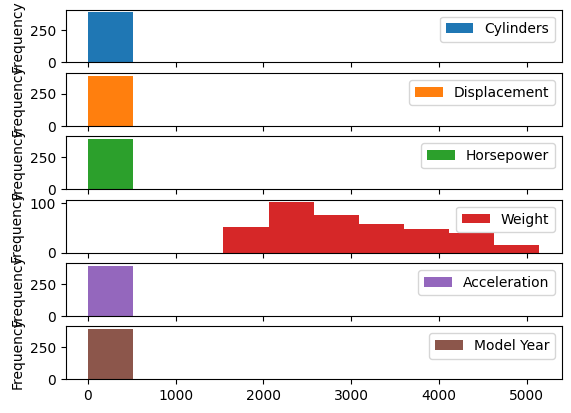

In [ ]:
oh_df.iloc[:,1:7].plot.hist(subplots=True, legend=True)

Es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo *podría* converger sin normalización de features, esto suele dificultar el entrenamiento.

**Observaciones**:
1. Aunque sólo entrenamos el escalador con el conjunto de datos de entrenamiento, este escalador también se utilizará para normalizar el conjunto de datos de prueba. Necesitamos hacer eso para proyectar el conjunto de datos de prueba en la misma distribución en la que el modelo ha sido entrenado.
2. El reescalamiento debe aplicarse a cualquier otro dato que entre al modelo, junto con la codificación de un punto que hicimos anteriormente. Eso incluye el conjunto de pruebas, así como los datos en vivo cuando el modelo se usa en producción.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

## El modelo

### Construcción del modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `sequential` con dos capas ocultas y una capa de salida que devuelve un único valor continuo.

Observa la elección de optimizador, métricas de rendimiento, función de costo y funciones de activación.

Podemos definir directamente el modelo, como en la notebook pasada:

In [ ]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train_scl.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation=None)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

⚡ Podemos también definirlo por medio de una función para generar nuevos modelos similares posteriormente:

In [ ]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scl.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

### Inspeccionemos el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 🔽 Acerca de la inicialización de los pesos

Observemos que ya podríamos realizar predicciones con el modelo sin entrenar. Es decir, los pesos están inicializados

Tomamos un *batch* de 10 ejemplos de los datos de entrenamiento y realizamos las predicciones.

In [ ]:
example_batch = X_train_scl[:10]
example_predictions = model.predict(example_batch)
example_predictions

1/1 [==============================] - 0s 219ms/step


array([[-0.3502825 ],
       [-0.89372355],
       [-0.1340648 ],
       [-0.18313038],
       [-0.10572537],
       [-0.00542482],
       [-0.46491137],
       [-0.5145132 ],
       [-0.4007352 ],
       [-0.03771057]], dtype=float32)

Podríamos medir su error MSE, o cualquier otra métrica de rendimiento.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train[:10],example_predictions)

815.5418104132902

### Entrenamos el modelo

Entrenamos el modelo durante 1000 épocas, registramos la precisión de entrenamiento y validación en el objeto `history`.

*El entrenamiendo debería durar alrededor de 1 minuto.*

In [ ]:
EPOCHS = 1000

history = model.fit(
  X_train_scl, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/1000
9/9 [==============================] - 1s 35ms/step - loss: 607.8028 - mae: 23.3806 - mse: 607.8028 - val_loss: 561.0948 - val_mae: 22.4313 - val_mse: 561.0948
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 555.2642 - mae: 22.2398 - mse: 555.2642 - val_loss: 509.3392 - val_mae: 21.2745 - val_mse: 509.3392
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 500.6746 - mae: 21.0323 - mse: 500.6746 - val_loss: 456.7878 - val_mae: 20.0121 - val_mse: 456.7878
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 443.0879 - mae: 19.6645 - mse: 443.0879 - val_loss: 398.0831 - val_mae: 18.5326 - val_mse: 398.0831
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 380.0561 - mae: 18.0730 - mse: 380.0561 - val_loss: 337.9959 - val_mae: 16.8597 - val_mse: 337.9959
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 316.6404 - mae: 16.3236 - mse: 316.6404 - val_loss: 276.2787 - val_

Podríamos visualizar la historia del entrenamiento durante cada época en un dataframe usando las estadísticas almacenadas en el diccionario `history.history`.

Realizaremos algunas manipulaciones adicionales con las historia del entrenamiento.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.373982,0.862872,1.373982,8.140191,2.109750,8.140191,995
996,1.187521,0.788724,1.187521,7.794331,2.073218,7.794331,996
997,1.276422,0.841595,1.276422,9.000670,2.119133,9.000670,997
998,1.424032,0.903215,1.424032,7.660635,1.961289,7.660635,998
999,1.147834,0.769765,1.147834,7.464980,1.953503,7.464980,999


Definimos la siguiente función para graficar las métricas de rendimiento durante el entrenamiento.

In [ ]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(history.epoch, history.history['mae'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mae'],
            label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(history.epoch, history.history['mse'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mse'],
            label = 'Val Error')
    plt.legend()
    plt.show()

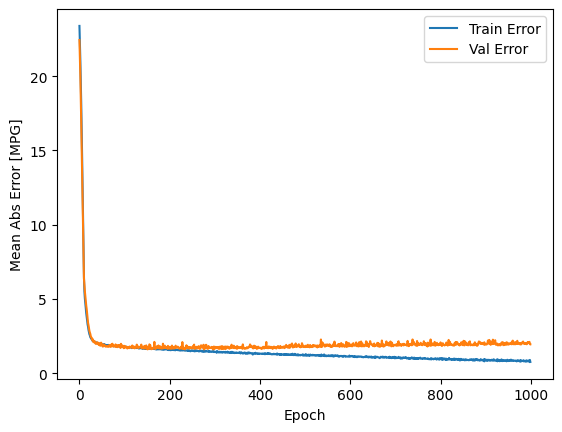

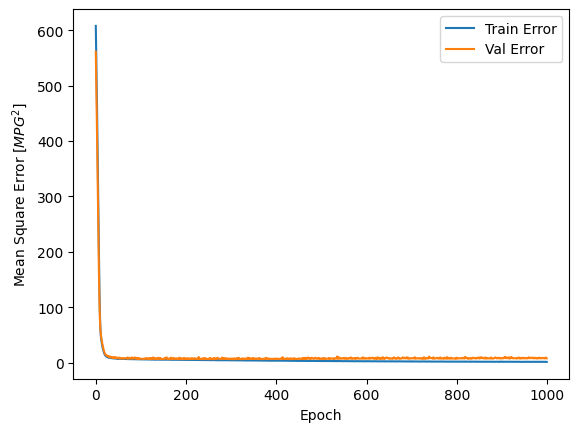

In [ ]:
plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. **Esta es una señal de overfitting**.

Repitamos el entrenamiento con menos épocas.

Observa el parámetro `verbose`

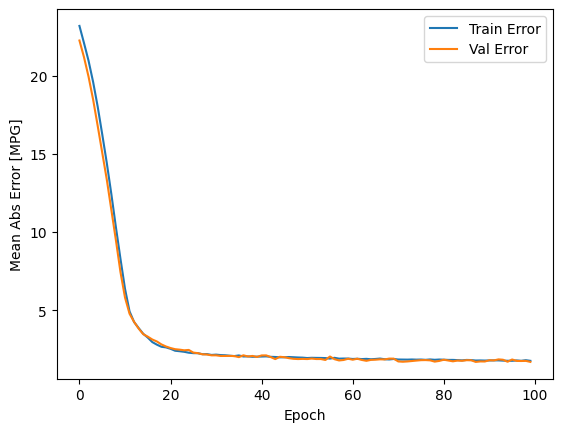

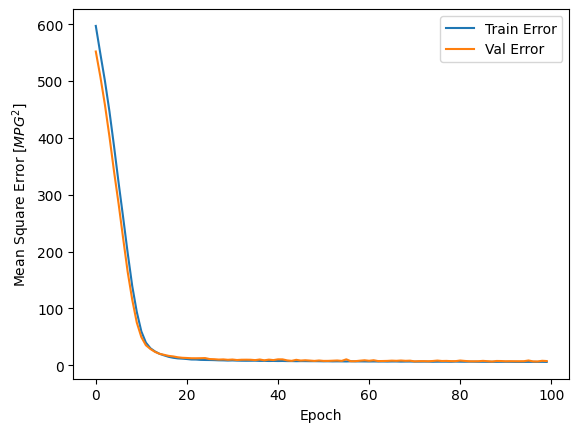

In [ ]:
model_me = build_model()

EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

plot_history(history)

### Métricas de rendimiento

Veamos qué tan bien generaliza el modelo al usar el **conjunto de prueba**, el cual no fue usado para entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.

In [ ]:
loss, mae, mse = model_me.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 7.4650 - mae: 1.9736 - mse: 7.4650 - 98ms/epoch - 49ms/step
MAE para las predicciones en el conjunto de prueba: 1.9736 MPG


### Predicciones

Finalmente, predecimos los valores de MPG utilizando los datos del conjunto de prueba

2/2 [==============================] - 0s 5ms/step


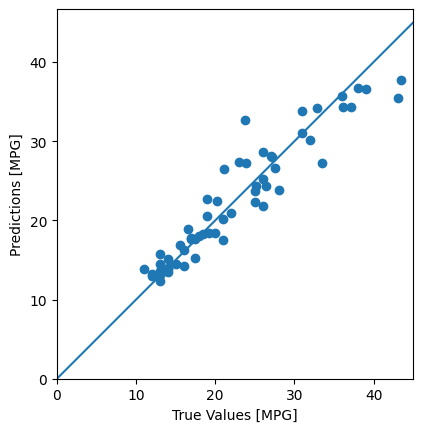

In [ ]:
y_pred = model_me.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Veamos la distribución de errores.

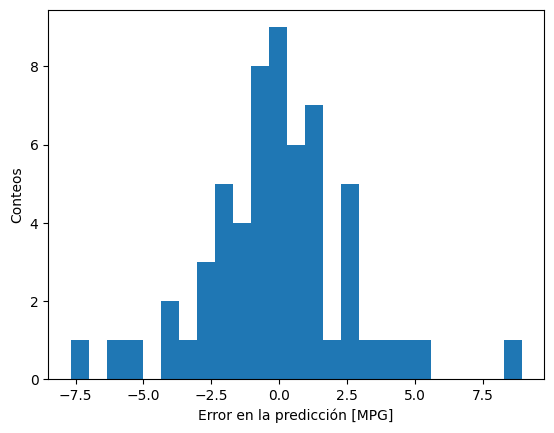

In [ ]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Error en la predicción [MPG]")
plt.ylabel("Conteos")
plt.show()

## ⭕ Práctica

Realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

4. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

5. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  

El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. Guarda estas predicciones en un archivo CSV.

**Práctia 2:**

*Ejercicio 1:*

In [ ]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

In [ ]:
df.isna().sum()
clean_df = df.dropna()

In [ ]:
oh_df = pd.get_dummies(data=clean_df,columns=['Origin'],
                       drop_first=True,dtype=int)
oh_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


In [ ]:
oh_df.rename(columns={
                    # 'Origin_1':'USA',
                      'Origin_2':'Europe',
                      'Origin_3':'Japan'},
             inplace=True)
oh_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


In [ ]:
X = oh_df.iloc[:,1:].values
y = oh_df['MPG'].values

print(X.shape, y.shape)

(390, 8) (390,)


In [ ]:
# from tensorflow.python import train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 331
Test size: 59


In [ ]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation=None)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [ ]:
EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 50ms/step - loss: 8267.8662 - mae: 50.6364 - mse: 8267.8662 - val_loss: 160.1399 - val_mae: 9.9265 - val_mse: 160.1399
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 108.3034 - mae: 8.2876 - mse: 108.3034 - val_loss: 323.5931 - val_mae: 17.1801 - val_mse: 323.5931
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 3604.1177 - mae: 50.8199 - mse: 3604.1177 - val_loss: 94.4068 - val_mae: 7.5722 - val_mse: 94.4068
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 129.7684 - mae: 9.3272 - mse: 129.7684 - val_loss: 605.3660 - val_mae: 24.1229 - val_mse: 605.3660
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 3741.2764 - mae: 48.9854 - mse: 3741.2764 - val_loss: 559.5574 - val_mae: 19.7442 - val_mse: 559.5574
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 1569.2637 - mae: 34.4389 - mse: 1569.2637 - val_loss: 4628.3853 - va

**Métricas**

In [ ]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(history.epoch, history.history['mae'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mae'],
            label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(history.epoch, history.history['mse'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mse'],
            label = 'Val Error')
    plt.legend()
    plt.show()

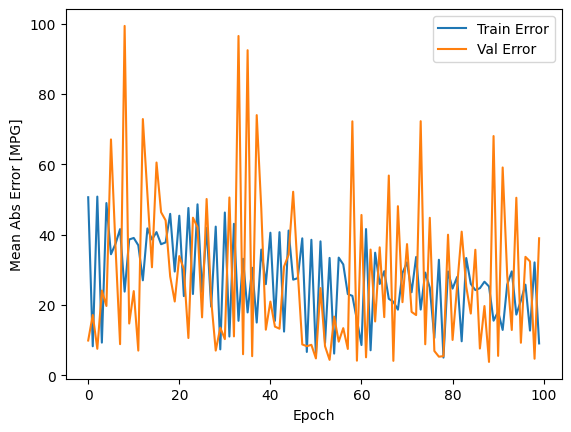

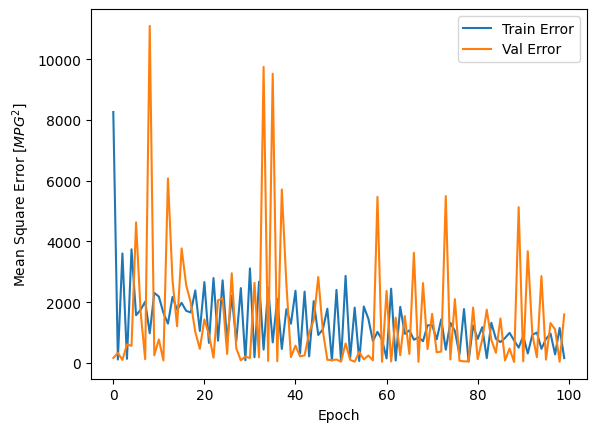

In [ ]:
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 1687.0049 - mae: 39.9690 - mse: 1687.0049 - 84ms/epoch - 42ms/step
MAE para las predicciones en el conjunto de prueba: 39.969 MPG


**Conclusión:** Normalizar los datos es un paso necesario, el Mae es mucho con un comportamiento errático





**Tarea 2:**

Modelo usando 100 épocas con normalización de datos con alguna de las funciones de activacion en la capa de salida

**Normalización**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train_scl.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation='tanh')
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [ ]:
EPOCHS = 100

history = model.fit(
  X_train_scl, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 95ms/step - loss: 589.5927 - mae: 23.0084 - mse: 589.5927 - val_loss: 562.8133 - val_mae: 22.5097 - val_mse: 562.8133
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 576.6611 - mae: 22.7372 - mse: 576.6611 - val_loss: 558.2816 - val_mae: 22.4143 - val_mse: 558.2816
Epoch 3/100
9/9 [==============================] - 0s 24ms/step - loss: 573.7489 - mae: 22.6747 - mse: 573.7489 - val_loss: 556.7807 - val_mae: 22.3823 - val_mse: 556.7807
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 572.6857 - mae: 22.6515 - mse: 572.6857 - val_loss: 556.1864 - val_mae: 22.3695 - val_mse: 556.1864
Epoch 5/100
9/9 [==============================] - 0s 27ms/step - loss: 572.2279 - mae: 22.6411 - mse: 572.2279 - val_loss: 555.8799 - val_mae: 22.3627 - val_mse: 555.8799
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 571.9852 - mae: 22.6356 - mse: 571.9852 - val_loss: 555.7235 - val_m

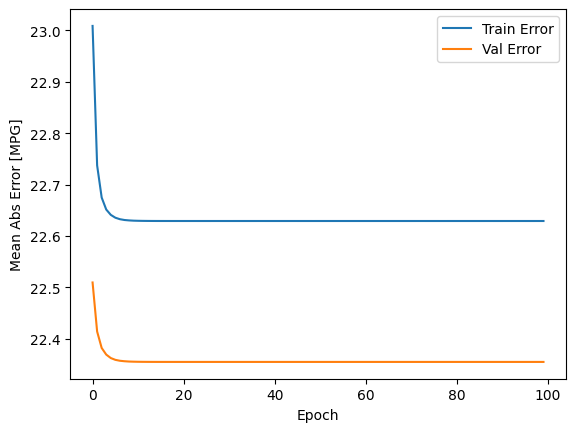

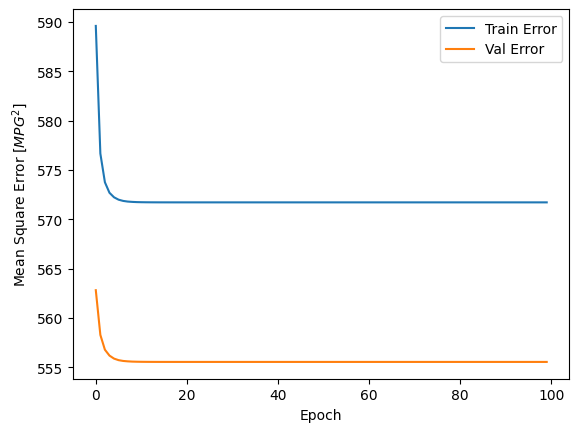

In [ ]:
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 534.4680 - mae: 21.5237 - mse: 534.4680 - 115ms/epoch - 57ms/step
MAE para las predicciones en el conjunto de prueba: 21.5237 MPG


**Conclusíon:** Se observa un estancamiento, y jamas se van a salir las salidas esperadas porque la estamos forzando a dar resultados

**Tarea 3:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation='relu')
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [ ]:
EPOCHS = 100

history = model.fit(
  X_train_scl, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 36ms/step - loss: 583.9492 - mae: 22.9201 - mse: 583.9492 - val_loss: 528.5462 - val_mae: 21.7674 - val_mse: 528.5462
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 518.9856 - mae: 21.5048 - mse: 518.9856 - val_loss: 467.6331 - val_mae: 20.3748 - val_mse: 467.6331
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 457.1641 - mae: 20.0751 - mse: 457.1641 - val_loss: 408.2784 - val_mae: 18.9100 - val_mse: 408.2784
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 392.0555 - mae: 18.4750 - mse: 392.0555 - val_loss: 343.6800 - val_mae: 17.1473 - val_mse: 343.6800
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 323.5858 - mae: 16.5951 - mse: 323.5858 - val_loss: 272.3794 - val_mae: 15.0262 - val_mse: 272.3794
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 251.6196 - mae: 14.4606 - mse: 251.6196 - val_loss: 209.3299 - val_mae: 

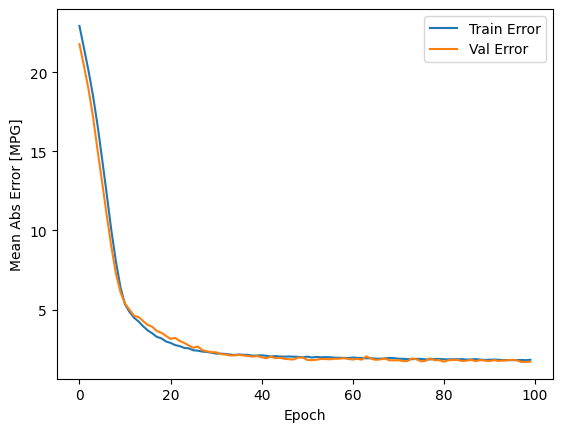

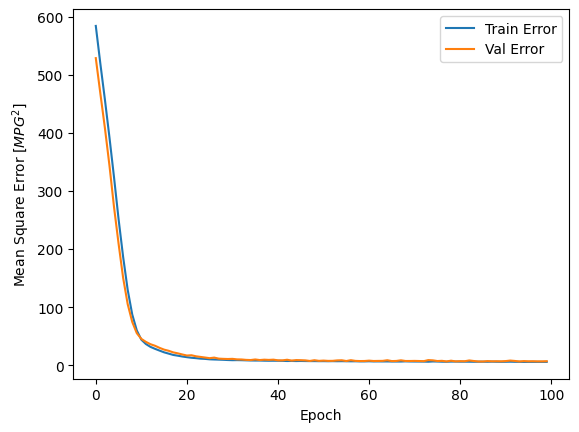

In [ ]:
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 6.5301 - mae: 1.8948 - mse: 6.5301 - 30ms/epoch - 15ms/step
MAE para las predicciones en el conjunto de prueba: 1.8948 MPG


**Conclusiones:**

Se observa un comportamiento muy similar al que encontramos, en el ejemplo de la clase, con um comportmaiento estable y con un error menor

**Modelos Pasados**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=189)


In [ ]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Definir el pipeline para Regresión Polinomial (grado 2)
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

# Definir el pipeline para Regresor KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar y evaluar cada modelo en el conjunto de prueba
pipelines = {
    'Regresión Lineal': linear_pipeline,
    'Regresión Polinomial (grado 2)': poly_pipeline,
    'Regresor KNN': knn_pipeline
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE de {name}: {mae}")

MAE de Regresión Lineal: 2.924186600165399
MAE de Regresión Polinomial (grado 2): 2.3346133474576276
MAE de Regresor KNN: 2.413898305084746


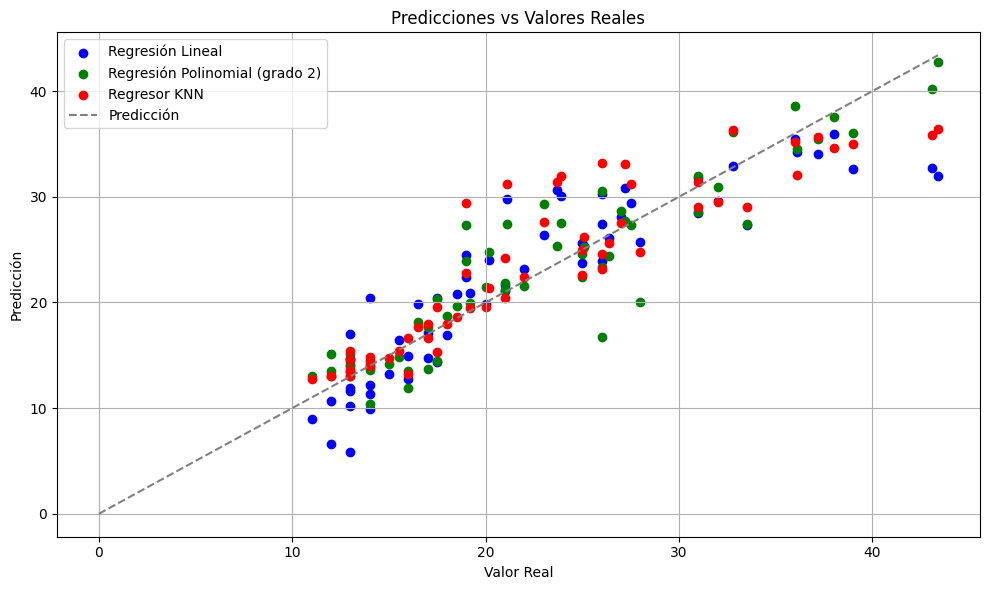

In [ ]:
y_pred_linear = linear_pipeline.predict(X_test)

# Ejemplo con Regresión Polinomial
y_pred_poly = poly_pipeline.predict(X_test)

# Ejemplo con Regresor KNN
y_pred_knn = knn_pipeline.predict(X_test)

# Graficar resultados
plt.figure(figsize=(10, 6))

# Graficar predicciones vs valores reales para Regresión Lineal
plt.scatter(y_test, y_pred_linear, color='blue', label='Regresión Lineal')

# Graficar predicciones vs valores reales para Regresión Polinomial
plt.scatter(y_test, y_pred_poly, color='green', label='Regresión Polinomial (grado 2)')

# Graficar predicciones vs valores reales para Regresor KNN
plt.scatter(y_test, y_pred_knn, color='red', label='Regresor KNN')

# Graficar la línea de 45 grados para referencia
max_value = np.max(np.concatenate([y_test, y_pred_linear, y_pred_poly, y_pred_knn]))
plt.plot([0, max_value], [0, max_value], color='gray', linestyle='--', label='Predicción')

plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV # Import the missing class

In [ ]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# No se necesitan parámetros adicionales para la Regresión Lineal simple

# Entrenar y evaluar Regresión Lineal
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"MAE de Regresión Lineal con mejores parámetros: {mae_linear}")

# Definir el pipeline para Regresión Polinomial (grado 2) con mejores parámetros
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"MAE de Regresión Polinomial (grado 2) con mejores parámetros: {mae_poly}")

# Definir el pipeline para Regresor KNN con mejores parámetros
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=7, weights='distance'))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"MAE de Regresor KNN con mejores parámetros: {mae_knn}")

MAE de Regresión Lineal con mejores parámetros: 2.924186600165399
MAE de Regresión Polinomial (grado 2) con mejores parámetros: 2.3346133474576276
MAE de Regresor KNN con mejores parámetros: 2.2815748779442666


## Conclusiones

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión. Otra métrica de regresión común es el error absoluto medio (MAE).
* Cuando las features de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, es preferible usar una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* El entrenamiento con pocas épocas es una técnica útil para evitar el sobreajuste. Otra técnica es el *early stopping* (coming soon...).